In [41]:
#fazendo os imports necessários
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
#lendo os dados
df = pd.read_csv('data\cancer_pele.csv')

In [3]:
df.shape

(10000, 18)

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,25.61,Yes,No,No,0.0,4.0,No,Female,70-74,White,No,No,Very good,5.0,No,No,Yes
1,No,23.67,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Very good,8.0,No,No,Yes
2,No,30.04,Yes,No,No,0.0,15.0,No,Female,45-49,White,No,No,Very good,7.0,Yes,No,Yes
3,No,24.63,Yes,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Excellent,8.0,No,No,Yes
4,No,27.46,No,No,No,0.0,0.0,No,Female,60-64,White,No,Yes,Good,6.0,No,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      10000 non-null  object 
 1   BMI               10000 non-null  float64
 2   Smoking           10000 non-null  object 
 3   AlcoholDrinking   10000 non-null  object 
 4   Stroke            10000 non-null  object 
 5   PhysicalHealth    10000 non-null  float64
 6   MentalHealth      10000 non-null  float64
 7   DiffWalking       10000 non-null  object 
 8   Sex               10000 non-null  object 
 9   AgeCategory       10000 non-null  object 
 10  Race              10000 non-null  object 
 11  Diabetic          10000 non-null  object 
 12  PhysicalActivity  10000 non-null  object 
 13  GenHealth         10000 non-null  object 
 14  SleepTime         10000 non-null  float64
 15  Asthma            10000 non-null  object 
 16  KidneyDisease     10000 non-null  object 

In [6]:
labelencoder = LabelEncoder()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer','AgeCategory']

# Iterar sobre todas as colunas do DataFrame
for column in columns:
    # Verificar se a coluna contém valores categóricos (não numéricos)
    if df[column].dtype == 'object':
        # Aplicar a transformação apenas para as colunas com valores categóricos
        df[column] = label_encoder.fit_transform(df[column])

# Verificar as primeiras linhas do DataFrame para confirmar as transformações
print(df.head())


   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  25.61        1                0       0             0.0   
1             0  23.67        0                0       0             0.0   
2             0  30.04        1                0       0             0.0   
3             0  24.63        1                0       0             0.0   
4             0  27.46        0                0       0             0.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0           4.0            0    0           10     5         0   
1           0.0            0    1            8     5         0   
2          15.0            0    0            5     5         0   
3           0.0            0    0            9     5         0   
4           0.0            0    0            8     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 0          4        5.0       0              0   

In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,25.61,1,0,0,0.0,4.0,0,0,10,5,0,0,4,5.0,0,0,1
1,0,23.67,0,0,0,0.0,0.0,0,1,8,5,0,1,4,8.0,0,0,1
2,0,30.04,1,0,0,0.0,15.0,0,0,5,5,0,0,4,7.0,1,0,1
3,0,24.63,1,0,0,0.0,0.0,0,0,9,5,0,1,0,8.0,0,0,1
4,0,27.46,0,0,0,0.0,0.0,0,0,8,5,0,1,2,6.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,12.88,1,1,0,0.0,0.0,0,0,2,5,0,0,0,6.0,1,0,0
9996,0,33.00,0,0,0,0.0,0.0,0,1,4,5,2,1,4,6.0,0,0,0
9997,0,32.08,0,0,0,0.0,0.0,0,1,2,5,0,1,2,6.0,0,0,0
9998,0,18.88,1,0,0,0.0,0.0,0,1,3,1,0,0,0,7.0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

# Definir os arrays X e Y
X = df.drop('SkinCancer', axis=1)
Y = df['SkinCancer']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de treinamento e teste
print("Dimensões do conjunto de treinamento:")
print("X_train:", X_train.shape)
print("Y_train:", y_train.shape)
print("\nDimensões do conjunto de teste:")
print("X_test:", X_test.shape)
print("Y_test:", y_test.shape)


Dimensões do conjunto de treinamento:
X_train: (8000, 17)
Y_train: (8000,)

Dimensões do conjunto de teste:
X_test: (2000, 17)
Y_test: (2000,)


In [17]:
#normalizamos o X de treino e teste
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [34]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def metodo_cotovelo(X_train, y_train, X_test, y_test, max_k):
    # List to store the accuracy values for each k
    accuracy_values = []

    # Iterate over the values of k
    for k in range(1, max_k + 1):
        # Create a KNN classifier with the current value of k
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate the accuracy score
        accuracy = accuracy_score(y_test, y_pred)

        # Append the accuracy value to the list
        accuracy_values.append(accuracy)

    # Plot the results
    plt.plot(range(1, max_k + 1), accuracy_values)
    plt.xlabel('Valor de K')
    plt.ylabel('Acuracia')
    plt.title('Metodo do Cotovelo para KNN Classificacao')
    plt.show()

    print(f"A melhor acurácia foi de {max(accuracy_values)} com k = {accuracy_values.index(max(accuracy_values)) + 1}")


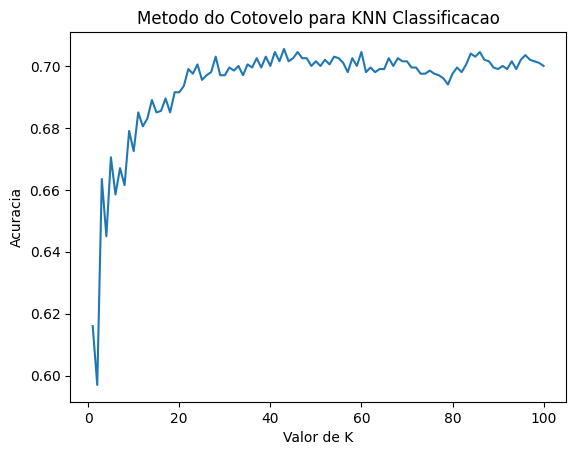

A melhor acurácia foi de 0.7055 com k = 43


In [35]:
metodo_cotovelo(X_train_normalized, y_train, X_test_normalized, y_test, max_k=100)

In [38]:
# Create a KNN classifier with the current value of k
knn = KNeighborsClassifier(n_neighbors=43)

# Train the model
knn.fit(X_train_normalized, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_normalized)

In [39]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       988
           1       0.66      0.84      0.74      1012

    accuracy                           0.71      2000
   macro avg       0.72      0.70      0.70      2000
weighted avg       0.72      0.71      0.70      2000



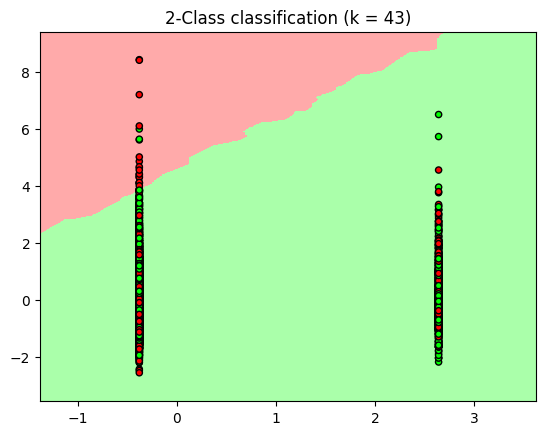

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Definindo os mapas de cores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Criar uma mesh
h = .02  # tamanho do passo na mesh
x_min, x_max = X_train_normalized[:, 0].min() - 1, X_train_normalized[:, 0].max() + 1
y_min, y_max = X_train_normalized[:, 1].min() - 1, X_train_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prever para cada ponto na mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocar o resultado em um plot de cores
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plotar os pontos de treinamento também
plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (knn.n_neighbors))

plt.show()
